In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.metrics

In [41]:
flying_animal_data_filename = 'data/report-201707170745.xls'
SPECIES_LBL = 'Species'
FLIES_LBL = 'flies'
MASS_LBL = 'Mass - average - g'
SQRT_MASS_LBL = 'sqrt mass'
LENGTH_LBL = 'Length - average - mm'
WINGSPAN_LBL = 'Wingspan - average - mm'

In [42]:
with open(flying_animal_data_filename, 'r') as infile:
    df = pd.read_excel(infile)

In [43]:
print "Dataset Rows", len(df)
flying_animals = df[df[FLIES_LBL] == 'YES'].dropna()
flying_animals[SQRT_MASS_LBL] = np.sqrt(flying_animals[MASS_LBL])
print "Flying animal Rows", len(flying_animals)
train_flying_animals, test_flying_animals = sklearn.model_selection.train_test_split(flying_animals, test_size=0.2, random_state=34)


Dataset Rows 437
Flying animal Rows 407


In [44]:
# Look at extreme
train_flying_animals.sort(columns=MASS_LBL, ascending=False).head(n=2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Species,flies,Mass - average - g,Length - average - mm,Wingspan - average - mm,sqrt mass
71,Ardeotis kori,YES,12250.0,1165.0,680.0,110.679718
148,Cygnus buccinator,YES,11500.0,1500.0,2200.0,107.238053


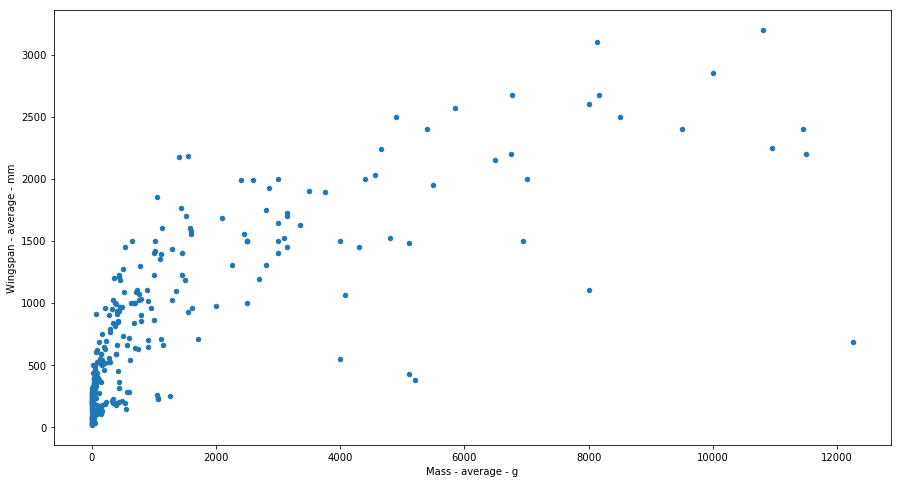

In [45]:
train_flying_animals.plot(kind='scatter', x=MASS_LBL, y=WINGSPAN_LBL, figsize=(15,8))

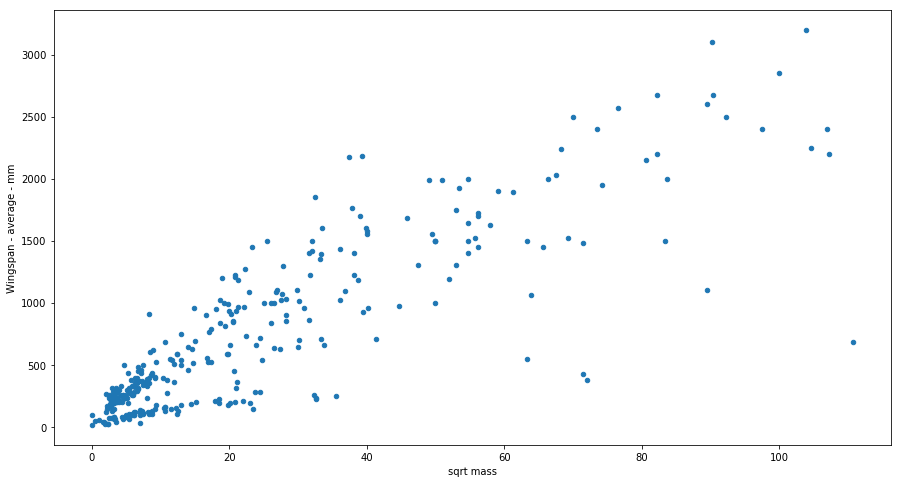

In [46]:
train_flying_animals.plot(kind='scatter', x=SQRT_MASS_LBL, y=WINGSPAN_LBL, figsize=(15,8))

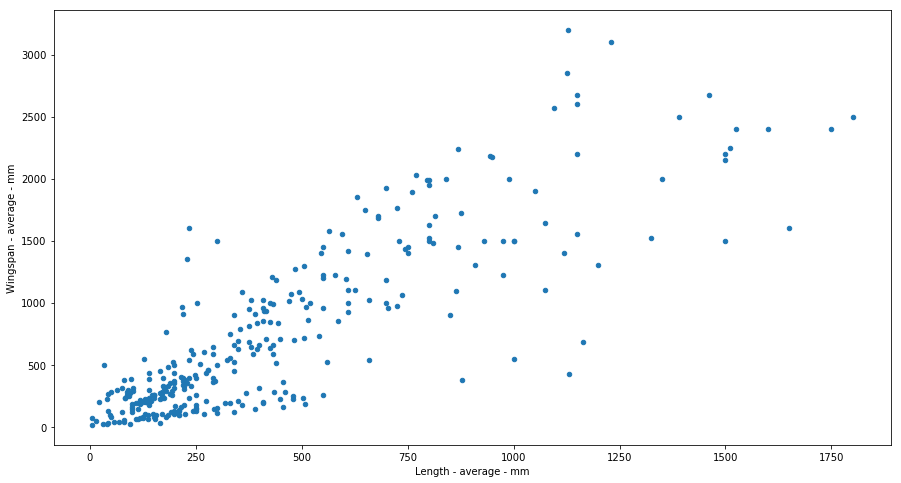

In [47]:
train_flying_animals.plot(kind='scatter', x=LENGTH_LBL, y=WINGSPAN_LBL, figsize=(15,8))

In [48]:
# Model with two features
feature_names = [SQRT_MASS_LBL, LENGTH_LBL]
output_name = WINGSPAN_LBL
model = sklearn.linear_model.LinearRegression()
model.fit(train_flying_animals[feature_names], train_flying_animals[output_name])
print "Train Score", model.score(train_flying_animals[feature_names], train_flying_animals[output_name])
print "Test Score", model.score(test_flying_animals[feature_names], test_flying_animals[output_name])

Train Score 0.764003424108
Test Score 0.736355894894


In [54]:
print model.coef_

[ 14.23247084   0.71236716]
